<a href="https://colab.research.google.com/github/chrisalpuerto/Bball-shot-Detection/blob/main/HoopDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Player Detection Using YOLOv8
In this session I will be creating a player detection model using YOLOv8



In [1]:
!pip install ultralytics roboflow kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 79.1MB/s]


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="kSbyldBcppeFTfZOiAQr")
project = rf.workspace("train-apozl").project("basketball-hoop-detection-bcxld-yphlb")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Basketball-Hoop-Detection--1 in yolov8:: 100%|██████████| 4920/4920 [00:02<00:00, 2265.35it/s]


In [4]:
print(dataset.location)
!ls /content/Basketball-Hoop-Detection--1/
base_path = '/content/Basketball-Hoop-Detection--1/'

/content/Basketball-Hoop-Detection--1
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [5]:
import os, shutil
from sklearn.model_selection import train_test_split

# create paths
base_path = '/content/Basketball-Hoop-Detection--1/'
train_images = os.path.join(base_path, "train", "images")
train_labels = os.path.join(base_path, "train", "labels")
val_images = os.path.join(base_path, "valid", "images")

# get all images files
images = os.listdir(train_images)
train_files, val_files = train_test_split(images, test_size=0.2, random_state=42)

# Create new valid folders
os.makedirs(os.path.join(base_path, "valid", "images"), exist_ok=True) # image directory
os.makedirs(os.path.join(base_path, "valid", "labels"), exist_ok=True) # label directory

for file in val_files:
    shutil.move(os.path.join(train_images, file), os.path.join(base_path, "valid", "images", file))
    label_file = file.replace(".jpg", ".txt").replace(".png", ".txt")
    shutil.move(os.path.join(train_labels, label_file), os.path.join(base_path, "valid", "labels", label_file))

Double checking length and the file type of dataset. Here we can see we are working with about 2023 images and all of them are jpg files

In [6]:
# checking length of dataset, as well as names of first n images

print(len(images))
res = 0
n = len(images)
for i in range(n):
  if (images[i])[-4:] == '.jpg':
    res += 1
if n == len(images):
  print(f"Amount of .jpg files in the dataset: {res}")
else:
  print(f"Amount of .jpg files with the first {n} images is {res}")


2023
Amount of .jpg files in the dataset: 2023


In [7]:
!ls /content/Basketball-Hoop-Detection--1/

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


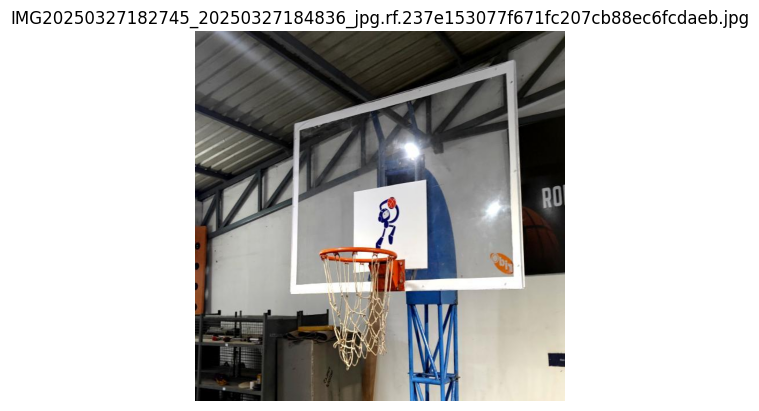

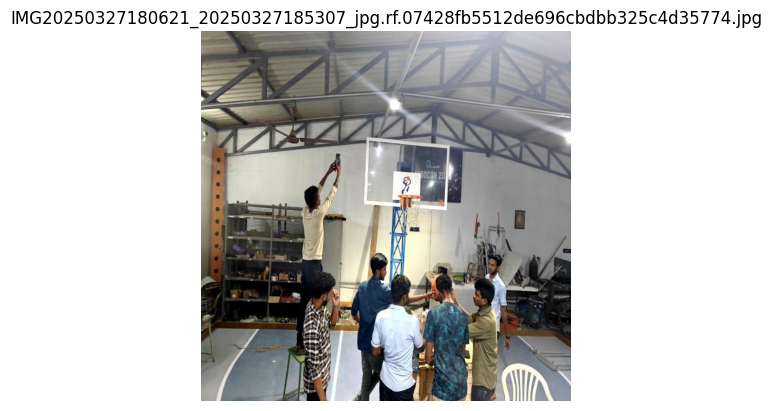

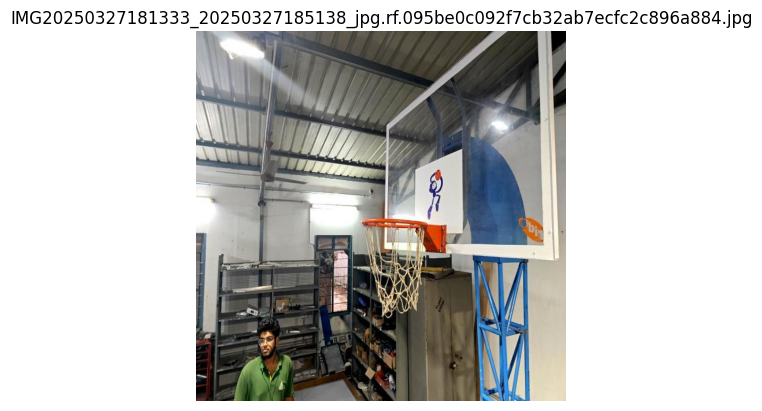

In [8]:
import matplotlib.pyplot as plt
import cv2
# train_images is image folder file path
image_file_test = os.listdir(train_images)

# check to see images in the middle of dataset

n = len(image_file_test) // 2


for i in range(n, n+3):
  img_path = os.path.join(train_images, image_file_test[i])
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(image_file_test[i])
  plt.axis('off')
  plt.show()

In [9]:
model = YOLO("yolov8n.pt")
model.train(
    data="/content/Basketball-Hoop-Detection--1/data.yaml",
    epochs=10
    )

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Basketball-Hoop-Detection--1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1267.4±356.1 MB/s, size: 61.8 KB)


train: Scanning /content/Basketball-Hoop-Detection--1/train/labels... 1618 images, 210 backgrounds, 0 corrupt: 100%|██████████| 1618/1618 [00:00<00:00, 1692.36it/s]

train: New cache created: /content/Basketball-Hoop-Detection--1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 1412. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2614.9±2066.4 MB/s, size: 359.2 KB)



val: Scanning /content/Basketball-Hoop-Detection--1/valid/labels... 680 images, 42 backgrounds, 0 corrupt: 100%|██████████| 680/680 [00:00<00:00, 1646.88it/s]

val: New cache created: /content/Basketball-Hoop-Detection--1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.101      2.647      1.134          1        640: 100%|██████████| 102/102 [05:34<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:20<00:00,  3.65s/it]

                   all        680        648      0.975      0.443      0.481      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.014       1.54      1.093          2        640: 100%|██████████| 102/102 [05:29<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:59<00:00,  2.69s/it]

                   all        680        648      0.963      0.444       0.47      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.029       1.12      1.094          2        640: 100%|██████████| 102/102 [05:25<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58<00:00,  2.64s/it]

                   all        680        648      0.991      0.455      0.481      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.9438     0.8335      1.041          2        640: 100%|██████████| 102/102 [05:25<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:55<00:00,  2.54s/it]

                   all        680        648      0.952      0.426      0.458       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9229     0.6936      1.051          2        640: 100%|██████████| 102/102 [05:23<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:59<00:00,  2.71s/it]

                   all        680        648      0.987       0.47      0.489      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.8816     0.6139       1.03          2        640: 100%|██████████| 102/102 [05:23<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:55<00:00,  2.50s/it]

                   all        680        648      0.983      0.429      0.479      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.8462     0.5505       1.01          2        640: 100%|██████████| 102/102 [05:24<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:56<00:00,  2.57s/it]

                   all        680        648      0.992       0.48      0.495      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.8464     0.5113      1.001          2        640: 100%|██████████| 102/102 [05:26<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:56<00:00,  2.56s/it]

                   all        680        648       0.99      0.486      0.495       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.8079      0.477     0.9952          1        640: 100%|██████████| 102/102 [05:24<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:55<00:00,  2.50s/it]

                   all        680        648      0.994      0.483      0.495       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.7692     0.4454     0.9849          2        640: 100%|██████████| 102/102 [05:22<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:00<00:00,  2.77s/it]

                   all        680        648      0.493      0.486      0.495      0.398



10 epochs completed in 1.072 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:57<00:00,  2.61s/it]


                   all        680        648      0.493      0.486      0.495      0.398
      Basket Ball Hoop        638        644      0.986      0.972       0.99      0.795
        Basketballhoop          4          4          0          0          0          0
Speed: 0.7ms preprocess, 51.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c20ee8bb7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804